In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
dataframes = {
    "top_2017" : pd.read_csv('../datasets/top2017.csv'), 
    "top_2018": pd.read_csv('../datasets/top2018.csv'), 
    "top_2019": pd.read_csv('../datasets/top2019.csv', encoding='mbcs', index_col=0), 
    "top_2010_2019": pd.read_csv('../datasets/top2010-2019.csv', encoding='mbcs', index_col=0)
}
key_map = {
    "top_2017" : {
        "title" : "Top Spotify Tracks of 2017",
        "marker" : "o",
        "color" : "r"
    }, 
    "top_2018": {
        "title" : "Top Spotify Tracks of 2018",
        "marker" : "s",
        "color" : "g"
    }, 
    "top_2019": {
        "title" : "Top 50 Spotify Songs - 2019", 
        "marker" : "D",
        "color" : "b"
    }, 
    "top_2010_2019": {
        "title" : "Top Spotify songs from 2010-2019 - BY YEAR", 
        "marker" : "H",
        "color" : "orange"
    },
}

dataframes["top_2019"] = dataframes["top_2019"].rename(columns={
    "Track.Name": "name", 
    "Artist.Name": "artists",
    "Beats.Per.Minute": "tempo",
    "Loudness..dB..": "loudness",
    "Valence.": "valence",
    "Length.": "length",
    "Acousticness.." : "acoustiness",
    "Speechiness.": "speechiness",
})
dataframes["top_2019"] = dataframes["top_2019"].rename(str.lower, axis="columns")
dataframes["top_2010_2019"] = dataframes["top_2010_2019"].rename(columns={
    "title": "name", 
    "artist": "artists",
    "top genre": "genre", 
    "bpm": "tempo",
    "nrgy": "energy",
    "dnce": "danceability", 
    "dB": "loudness", 
    "live" : "liveness", 
    "val": "valence", 
    "dur": "length",
    "acous": "acoustiness",
    "pop": "popularity",
    "spch": "speechiness"
})

for _ in ["top_2017", "top_2018"]:
    dataframes[_]["popularity"] = dataframes[_].index

for _ in ["top_2019", "top_2010_2019"]:
    dataframes[_]["danceability"] = dataframes[_]["danceability"] / 100

In [2]:
def scatter(dfs: dict, c1: str, c2: str):
    global key_map

    ret, axs = plt.subplots(1, 4, figsize=(20,5))
    for key, i in zip(dfs, range(len(dfs))):
        try:
            x = dfs[key][c1]
            y = dfs[key][c2]
            max_x = round(x.max())
            max_y = round(y.max())
        except Exception as e:
            # print(f"{i}: {e}")
            continue
        
        _ = key_map[key]
        axs[i].scatter(x, y, marker=_["marker"], color=_["color"])
        axs[i].set_xlim([0, max_x])
        axs[i].set_ylim([0, max_y])
        axs[i].title.set_text(_["title"])
        axs[i].set(xlabel=c1.capitalize(), ylabel=c2.capitalize())

    ret.suptitle(f"{c2.capitalize()} vs {c1.capitalize()}")
    return ret

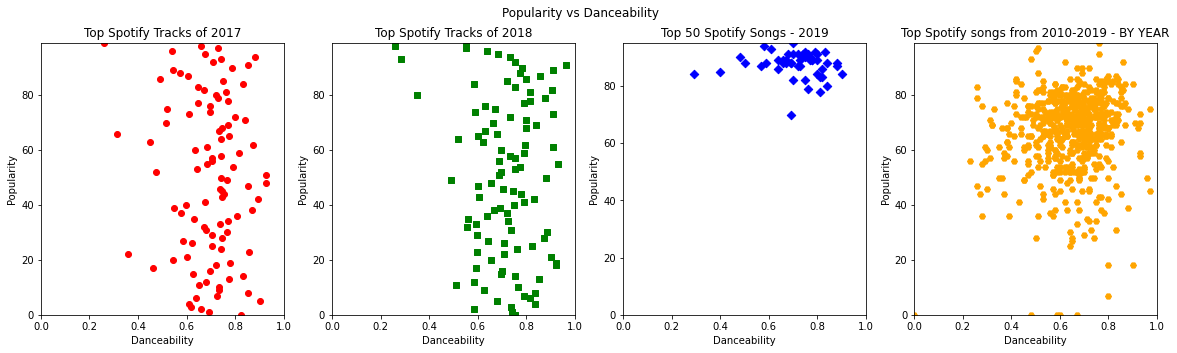

In [3]:
scatter_plots = scatter(dataframes, "danceability", "popularity")